In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Set defaults for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.block_plt = False

In [ ]:
# Create linear data
def create_linear_data(num_data=100, y_offset=0, slope=2, stdev=0.3):
    tf.random.set_seed(42)
    X = 10 * tf.random.uniform(shape=[num_data])
    y = y_offset + slope * X + tf.random.normal(stddev=stdev,shape=[num_data])
    X = tf.reshape(X,(len(X),1))
    y = tf.reshape(y,(len(X),1))
    return X, y

In [ ]:
# Create non-linear data
def create_non_linear_data(Xmin=-10, Xmax=10, num_data=100, theta_0=0, theta_1=0.3, theta_2=0.05, noise=0.1):
    tf.random.set_seed(42)
    X = np.linspace(Xmin,Xmax,num=num_data)
    y = theta_0 + theta_1 * X * np.cos(X) + theta_2 * X**2 + noise * np.random.normal(size=num_data)
    
    X = tf.reshape(X, (len(X), 1))
    y = tf.reshape(y, (len(y), 1))
    '''
    print(X)
    print(y)
    '''
    return X, y

In [ ]:
# Plot a graph of an input Tensor
def plot_data(x,y):
    plt.figure
    plt.plot(x,y,'b.')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    

In [135]:
def create_and_compile_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation=None, use_bias=True))
    model.summary()
    model.compile(loss='mse', optimizer='adam')
    return model

In [ ]:
def train_model(model, X, y):
    history = model.fit(X, y, epochs=1000, verbose=0)
    return history

In [ ]:
def plot_loss_vs_epochs(loss_values,epochs):
    plt.figure(figsize=[15,5])
    plt.plot(epochs, loss_values, "red", label='Training loss')
    plt.title('Traning and Validation loss')
    plt.xlabel('Epocs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
def display_non_linear_predictions(model):
    pred_theta_0 = model.layers[0].bias[0].numpy()
    temp         = model.layers[0].weights[0].numpy()
    pred_theta_1 = temp[0]
    #pred_theta_2 = temp[1]
    print('Predicted Coefficients:\n')
    print('theta_0 = ', pred_theta_0)
    print('theta_1 = ', pred_theta_1[0])
    #print('theta_2 = ', pred_theta_2[0])
    
    

In [ ]:
def display_slope_prediction(model):
    print('predicted slope', model.layers[0].weights[0].numpy())

In [133]:
def display_offset_prediction(model):
    print('predicted offset', model.layers[0].weights[1].numpy())
    

In [131]:
def main():
    X, y = create_linear_data()
    plot_data(X,y)
    model = create_and_compile_model()
    training_history = train_model(model,X,y)
    loss_values = training_history.history['loss']
    epochs = range(1,len(loss_values) + 1)
    plot_loss_vs_epochs(loss_values, epochs)
    display_slope_prediction(model)
    display_offset_prediction(model)
    

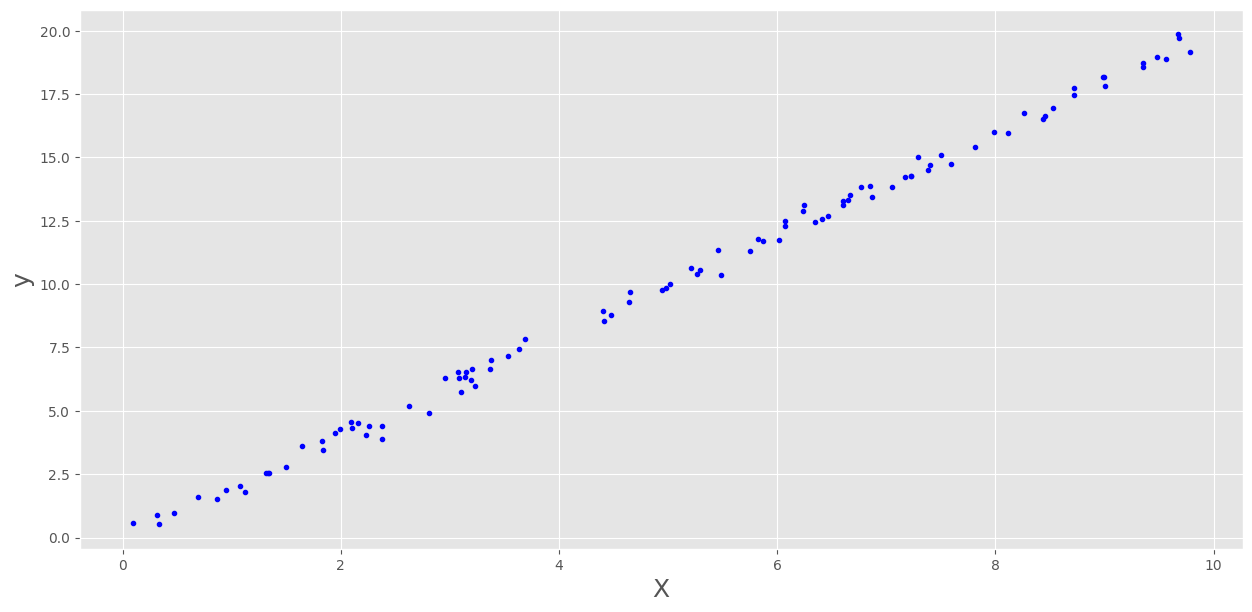

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


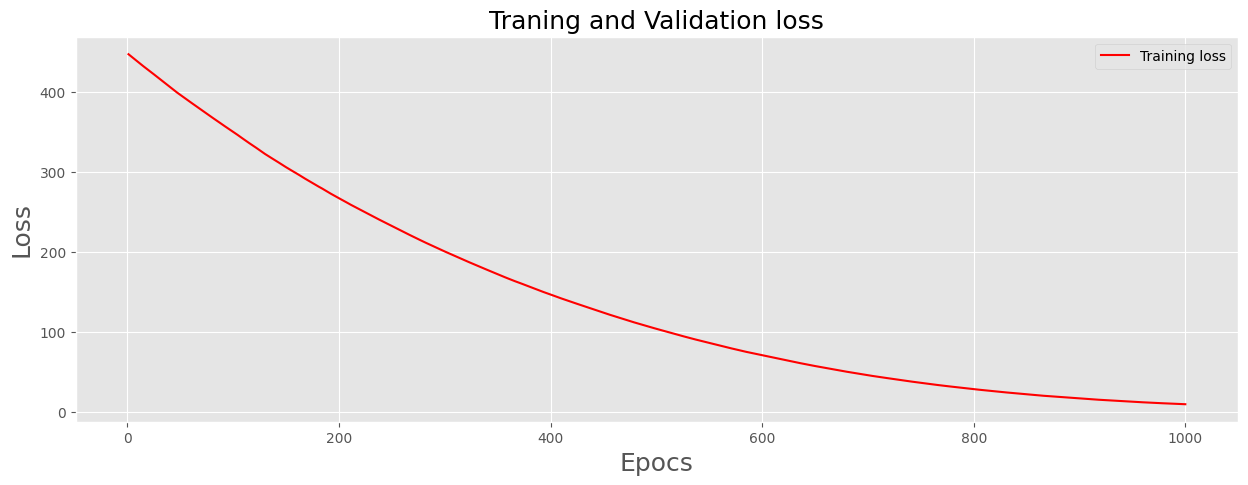

slope [[1.0898571]]
predicted offset [2.7388506]


In [134]:
if __name__ == '__main__':
    main()
    